In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip -q install minisom

  Preparing metadata (setup.py) ... done


In [ ]:
# importando bibliotecas
import pandas as pd
from minisom import MiniSom
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

In [ ]:
# Load data
data = pd.read_csv("/content/drive/MyDrive/datasets/apple_quality.csv")


In [ ]:
# visualizando as colunas do dataset
data.columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

In [ ]:
# verificandos os tipos de dados das colunas
data.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

In [ ]:
# verificando as ultimas linhas - necessita remoção da linha 4000
data.tail(5)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [ ]:
data.drop(4000, inplace=True)

In [ ]:
data.tail(5)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [ ]:
# convertendo a coluna para float
data['Acidity'] = data['Acidity'].astype(float)
data.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality         object
dtype: object

In [ ]:
X = data[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']].values

In [ ]:
# Normalizar os dados
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

In [ ]:
# Definir os parâmetros do SOM
# Pela regra de Hebbian-Lattice, que sugere que o número de neurônios
# deve ser aproximadamente 5 vezes a raiz quadrada do número de amostras no conjunto de dados
print(f'tamanho recomendado da grid: {sqrt(5*sqrt(4000))}')
som_shape = (17, 17)  # Tamanho do grid do SOM
input_len = X.shape[1]  # Número de features

tamanho recomendado da grid: 17.78279410038923


In [ ]:
# Inicializar o SOM
som = MiniSom(som_shape[0], som_shape[1], input_len, sigma=0.5, learning_rate=0.5)

In [ ]:
# Inicializar os pesos do SOM
som.random_weights_init(X)

In [ ]:
# Treinar o SOM
som.train_random(X, 10000, verbose=True)  # 1000 iterações

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.13110985049859755


In [ ]:
# Obter os clusters dos dados
clusters = np.array([som.winner(x) for x in X])


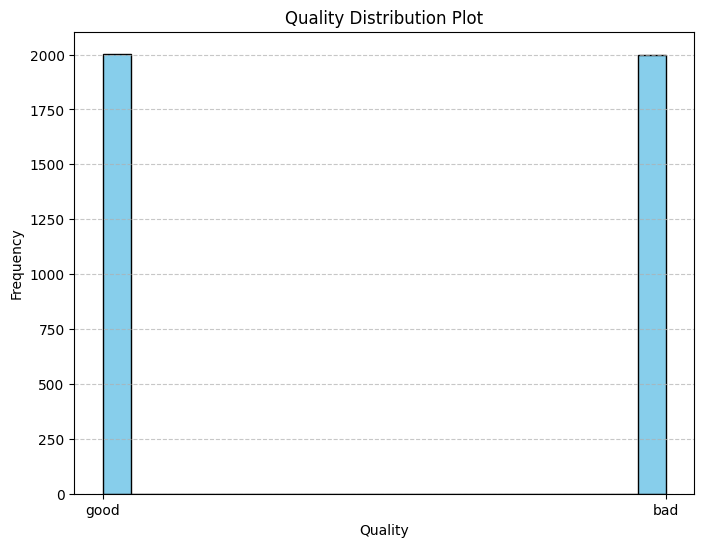

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(data['Quality'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Quality Distribution Plot')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

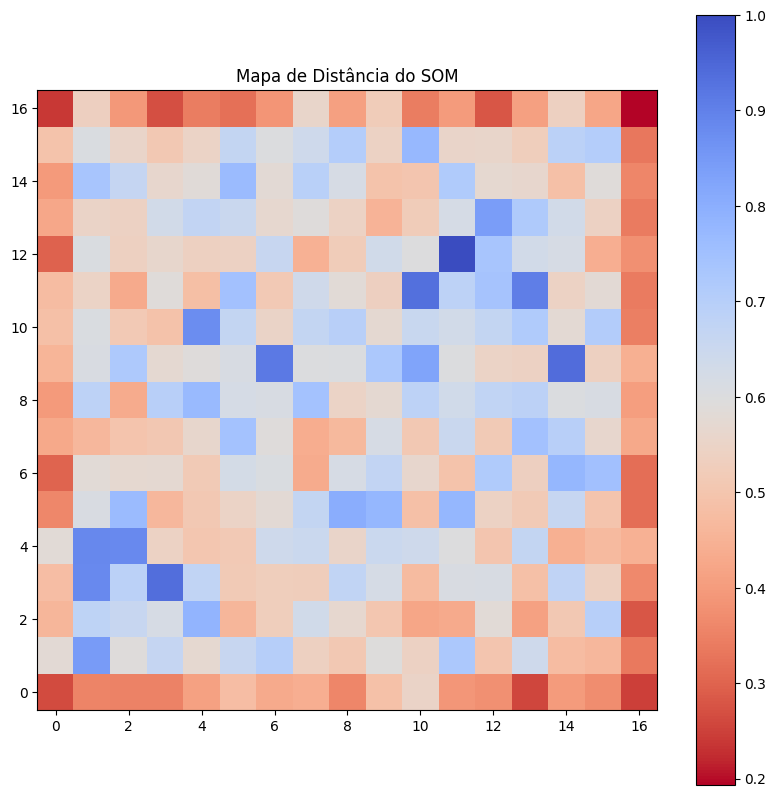

In [ ]:
# Visualizar os clusters no mapa do SOM
plt.figure(figsize=(10, 10))
plt.imshow(som.distance_map().T, cmap='coolwarm_r', origin='lower')
plt.colorbar()
plt.title('Mapa de Distância do SOM')
plt.show()

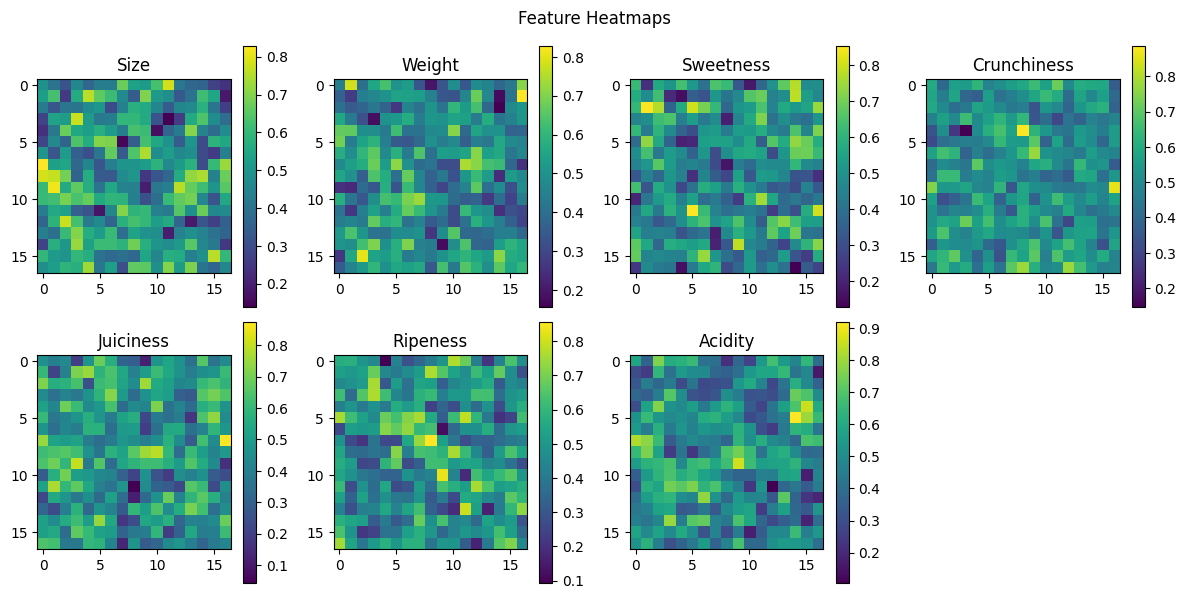

In [ ]:
plt.figure(figsize=(12, 6))
column_names = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']  # Nomes das colunas do seu DataFrame
for i in range(input_len):
    plt.subplot(2, 4, i+1)
    plt.imshow(som.get_weights()[:,:,i], cmap='viridis')
    plt.title(column_names[i])
    plt.colorbar()
plt.suptitle('Feature Heatmaps')
plt.tight_layout()
plt.show()


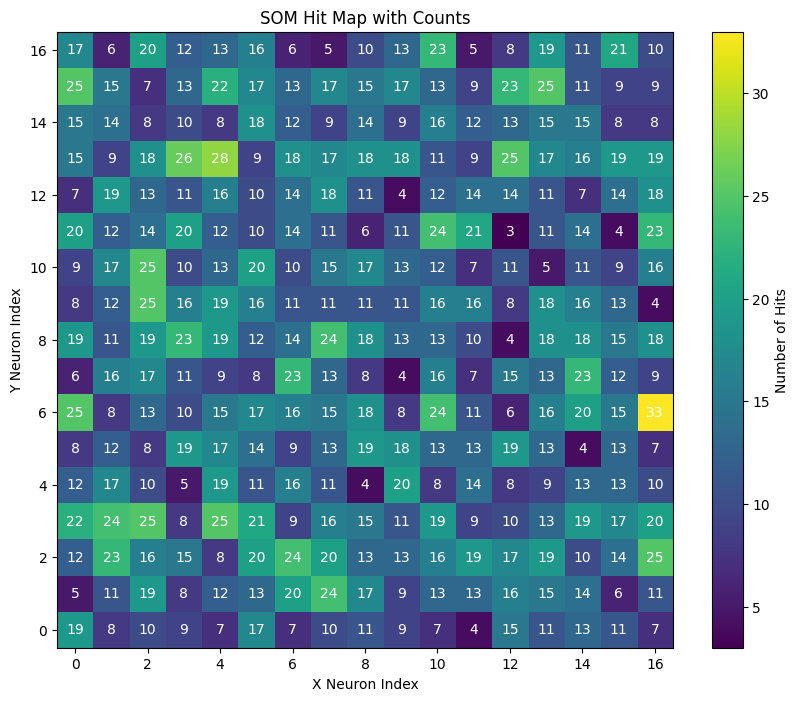

In [ ]:
hit_counts = np.zeros((som_shape[0], som_shape[1]))

for x, y in clusters:
    hit_counts[x, y] += 1

plt.figure(figsize=(10, 8))
plt.imshow(hit_counts, cmap='viridis', origin='lower')

# Annotate each cell with its count
for i in range(hit_counts.shape[0]):
    for j in range(hit_counts.shape[1]):
        plt.text(j, i, str(int(hit_counts[i, j])), ha='center', va='center', color='white')

plt.colorbar(label='Number of Hits')
plt.title('SOM Hit Map with Counts')
plt.xlabel('X Neuron Index')
plt.ylabel('Y Neuron Index')
plt.show()

In [ ]:
print(data['Quality'].value_counts())
df = data.copy()

good    2004
bad     1996
Name: Quality, dtype: int64


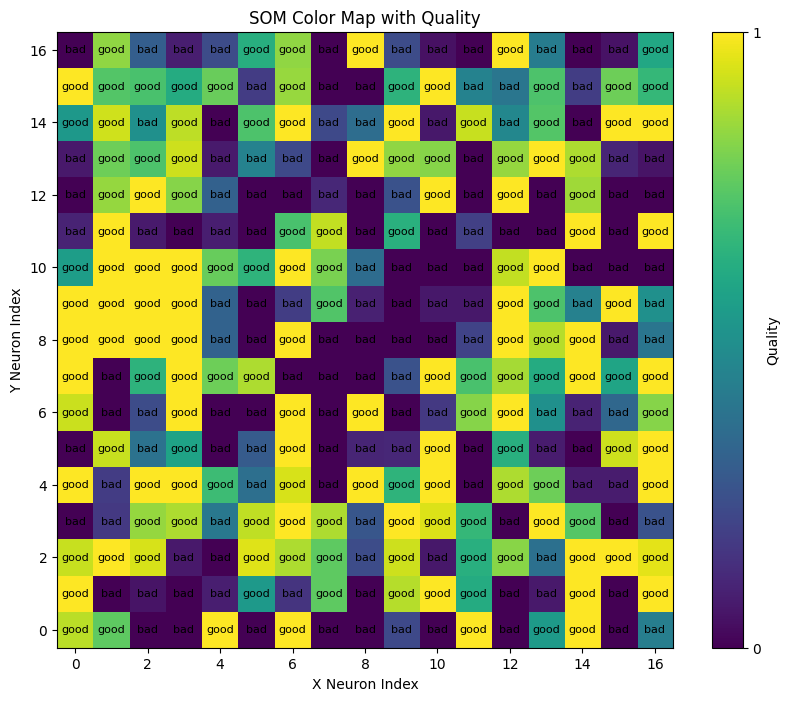

In [ ]:
# Primeiro, vamos criar um mapa de hits para a coluna 'Quality'
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Quality'] = encoder.fit_transform(df['Quality'])  # 'bad' será 0 e 'good' será 1

quality_map = np.zeros((som_shape[0], som_shape[1], 2))

for (x, y), quality in zip(clusters, df['Quality']):
    quality_map[x, y, quality] += 1

# Agora, vamos criar um mapa de cores baseado na proporção de 'good' para 'bad'
color_map = np.zeros((som_shape[0], som_shape[1]))
for i in range(som_shape[0]):
    for j in range(som_shape[1]):
        total = quality_map[i, j, 0] + quality_map[i, j, 1]
        if total > 0:
            color_map[i, j] = quality_map[i, j, 1] / total  # Proporção de 'good'

plt.figure(figsize=(10, 8))  # Aumentar o tamanho da figura
plt.imshow(color_map, cmap='viridis', origin='lower')

# Anotar cada célula com 'good' ou 'bad'
for i in range(color_map.shape[0]):
    for j in range(color_map.shape[1]):
        plt.text(j, i, 'good' if color_map[i, j] > 0.5 else 'bad', ha='center', va='center', color='black', fontsize=8)  # Diminuir o tamanho da fonte

plt.colorbar(ticks=[0, 1], label='Quality')
plt.title('SOM Color Map with Quality')
plt.xlabel('X Neuron Index')
plt.ylabel('Y Neuron Index')
plt.show()


In [ ]:
print(df['Quality'].value_counts())

1    2004
0    1996
Name: Quality, dtype: int64


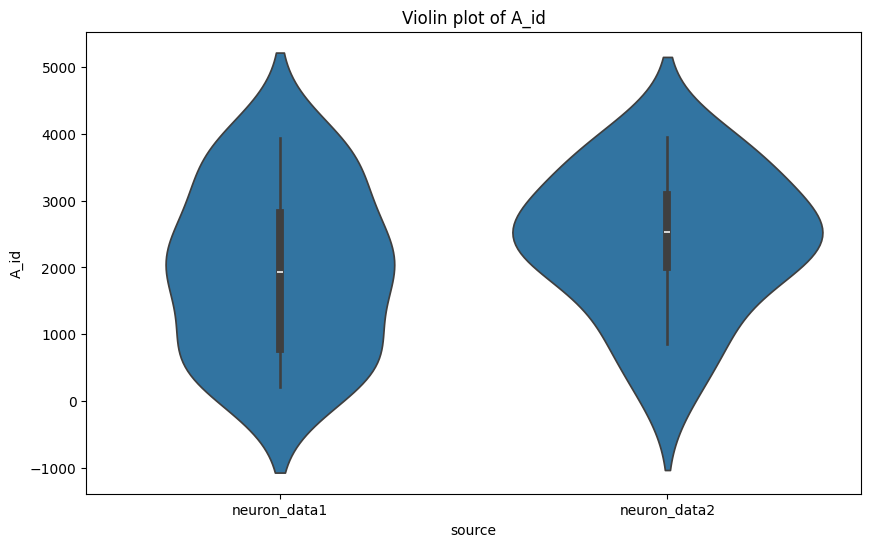

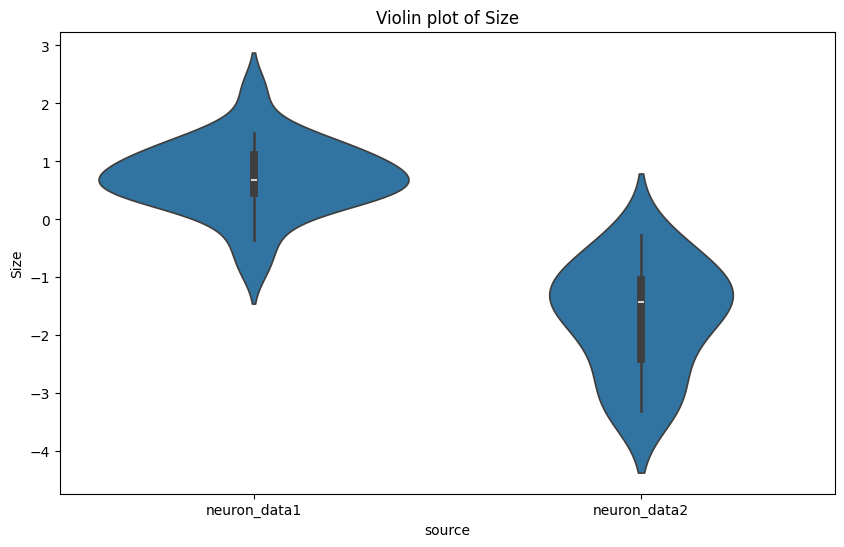

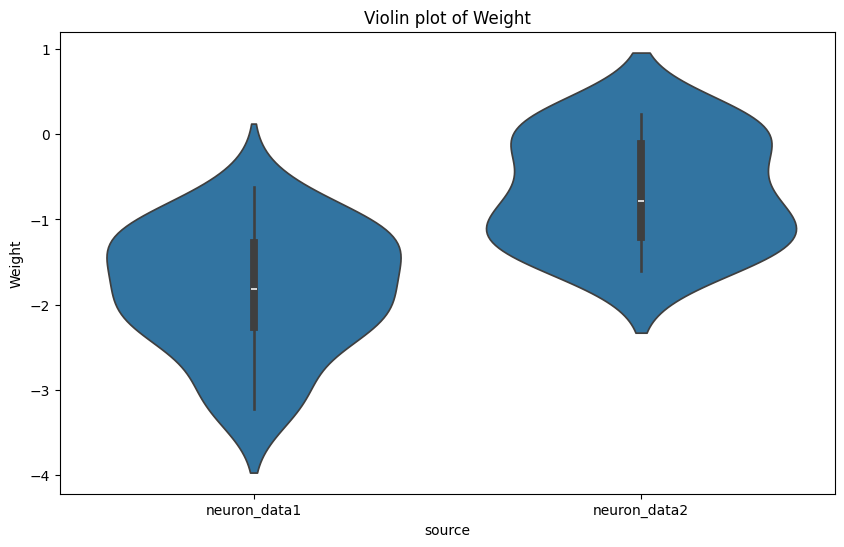

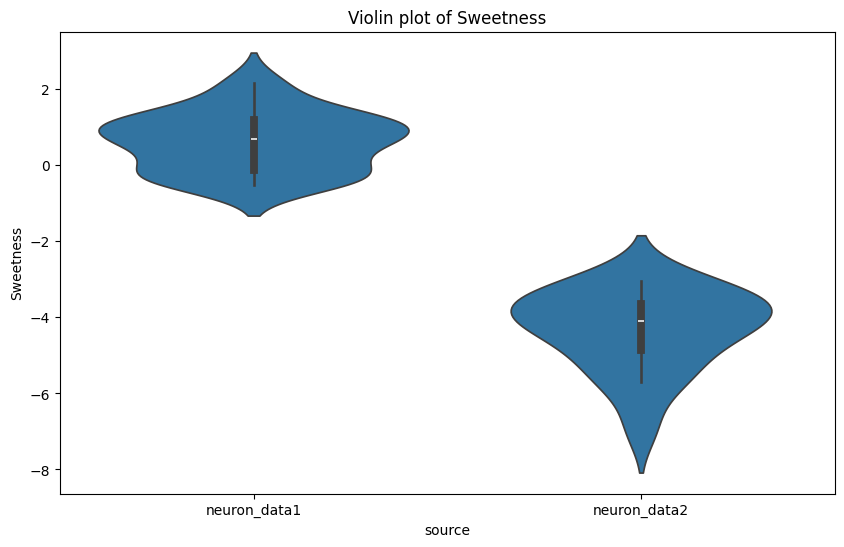

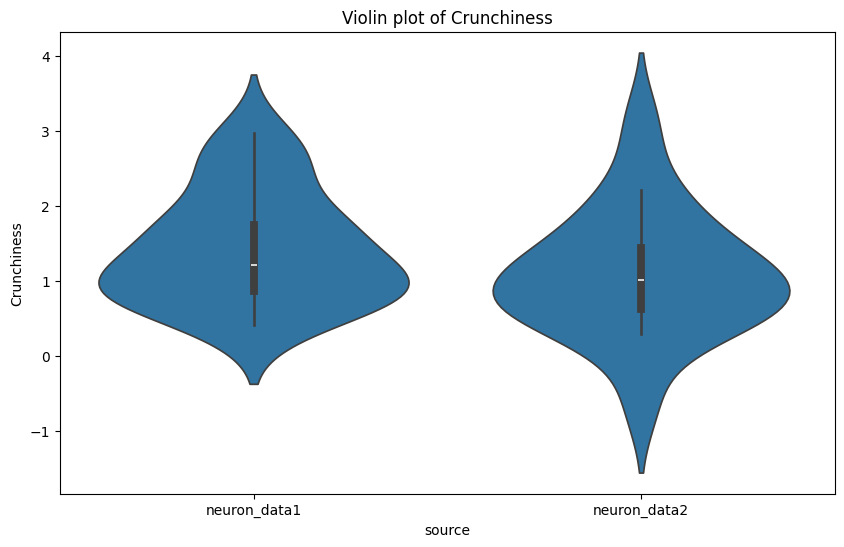

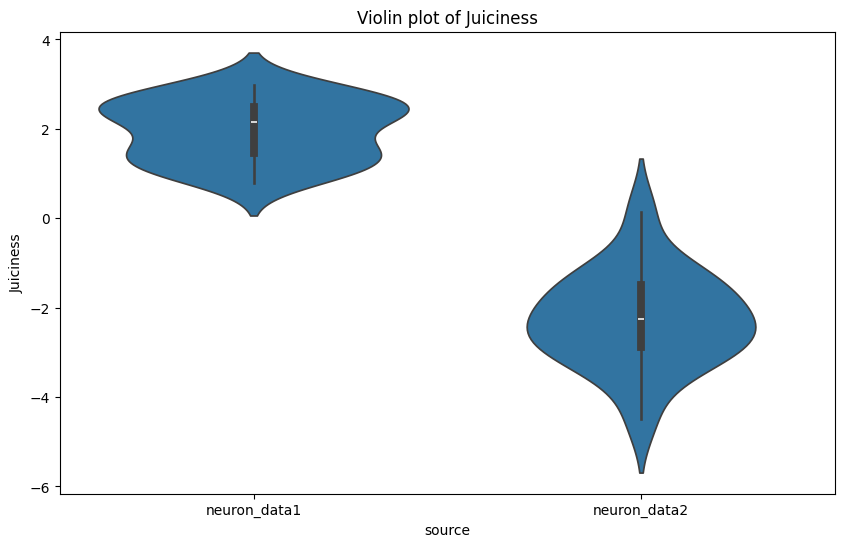

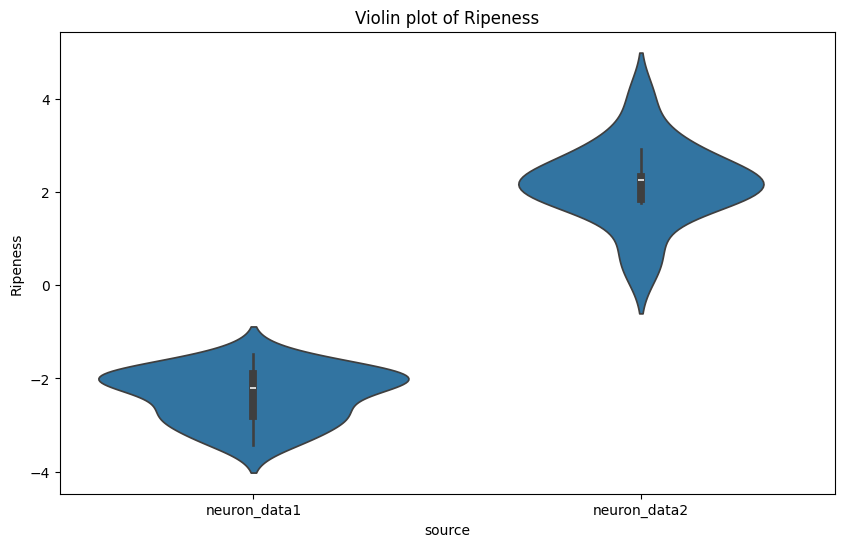

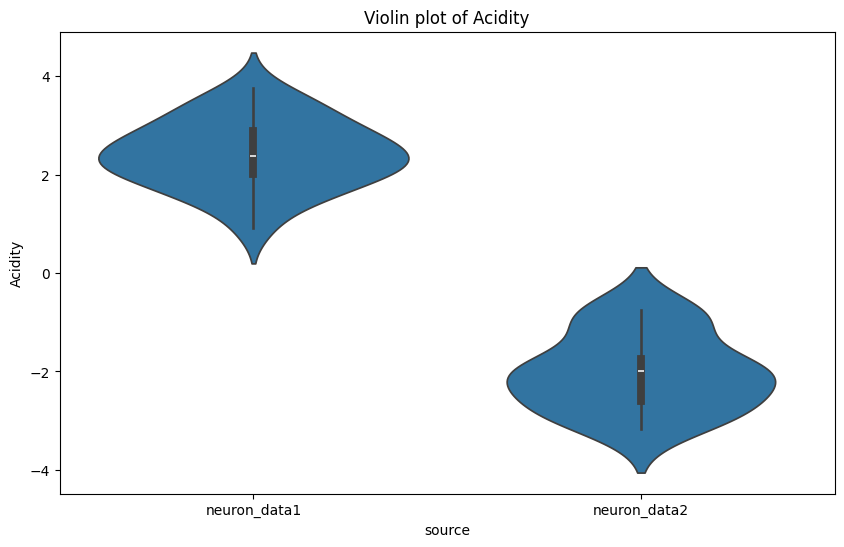

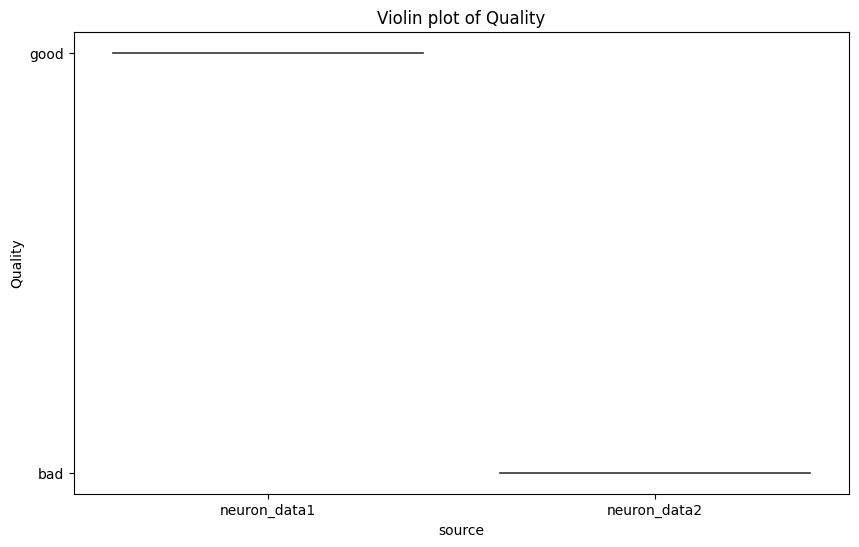

In [ ]:
# Primeiro, obtenha os vencedores para cada dado de entrada
winners = np.array([som.winner(d) for d in X])

# Em seguida, crie um dicionário que mapeia cada neurônio para os índices dos dados de entrada que são mapeados para ele
from collections import defaultdict

cluster_dict = defaultdict(list)
for i, win in enumerate(winners):
    cluster_dict[tuple(win)].append(i)

# Agora você pode usar cluster_dict da mesma maneira que antes
neuron_x = 2
neuron_y = 9
mapped_indices = cluster_dict[(neuron_y, neuron_x)]
neuron_data1 = data.iloc[mapped_indices].copy()

neuron_x = 7
neuron_y = 13
mapped_indices = cluster_dict[(neuron_y, neuron_x)]
neuron_data2 = data.iloc[mapped_indices].copy()

neuron_data1['source'] = 'neuron_data1'
neuron_data2['source'] = 'neuron_data2'
combined_data = pd.concat([neuron_data1, neuron_data2])

# Para cada coluna, exceto a coluna 'source', crie um gráfico de violino
import seaborn as sns
for column in combined_data.columns:
    if column != 'source':
        plt.figure(figsize=(10, 6))
        sns.violinplot(x='source', y=column, data=combined_data)
        plt.title(f'Violin plot of {column}')
        plt.show()



In [ ]:
print(combined_data['Quality'].value_counts())


good    25
bad     17
Name: Quality, dtype: int64


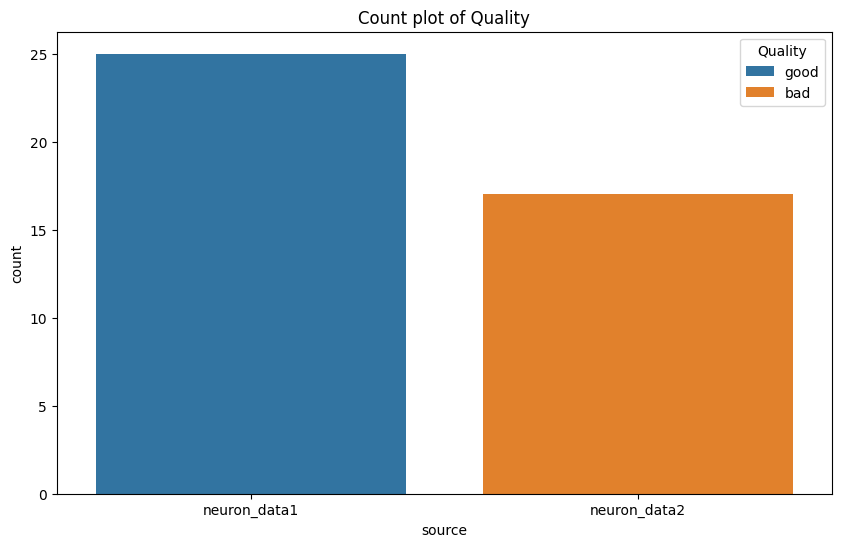

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='source', hue='Quality', data=combined_data)
plt.title('Count plot of Quality')
plt.show()




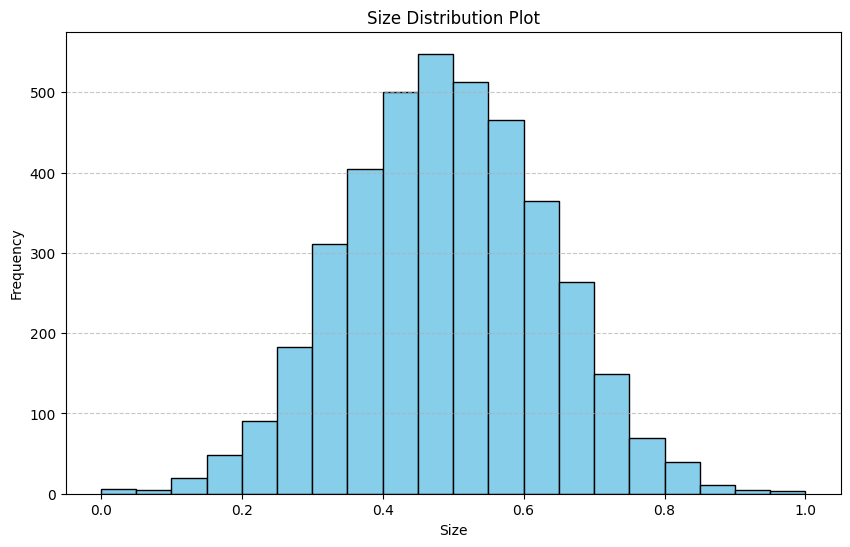

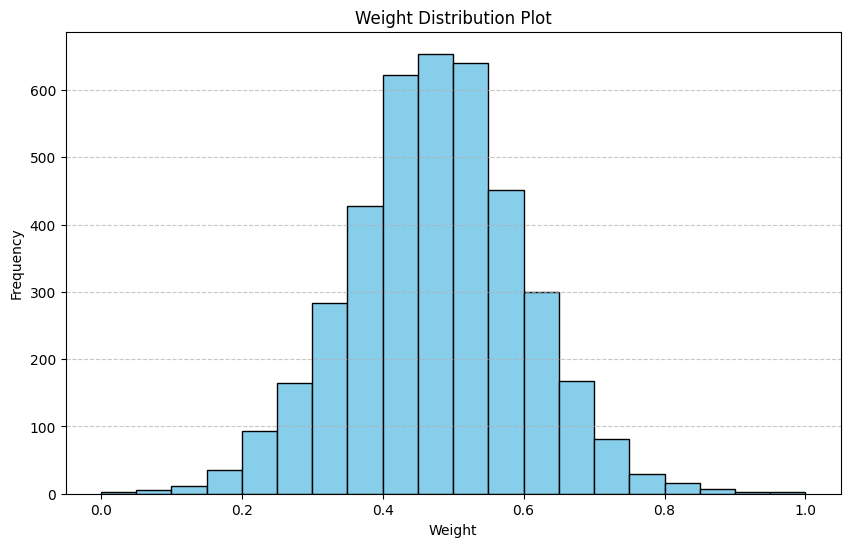

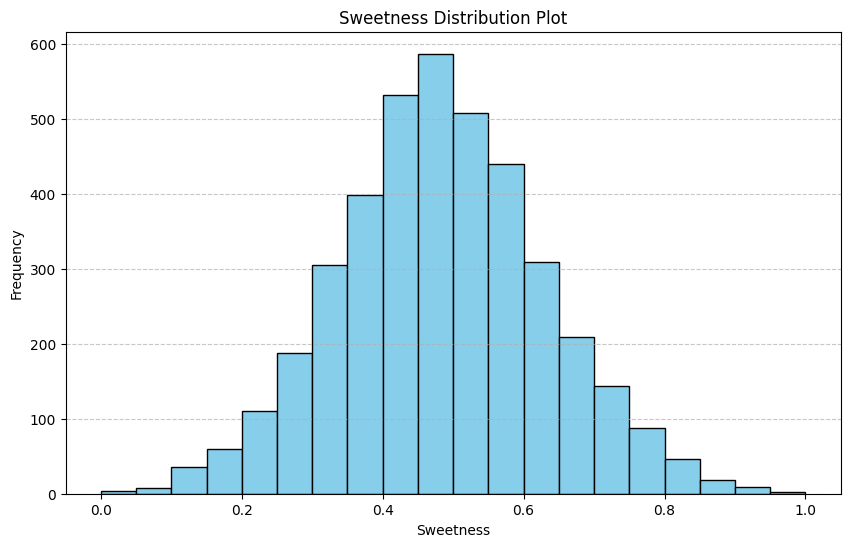

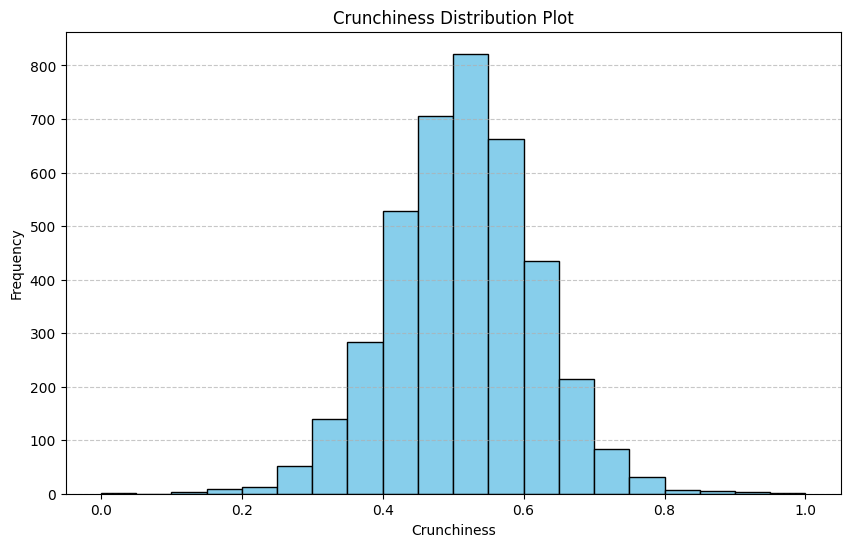

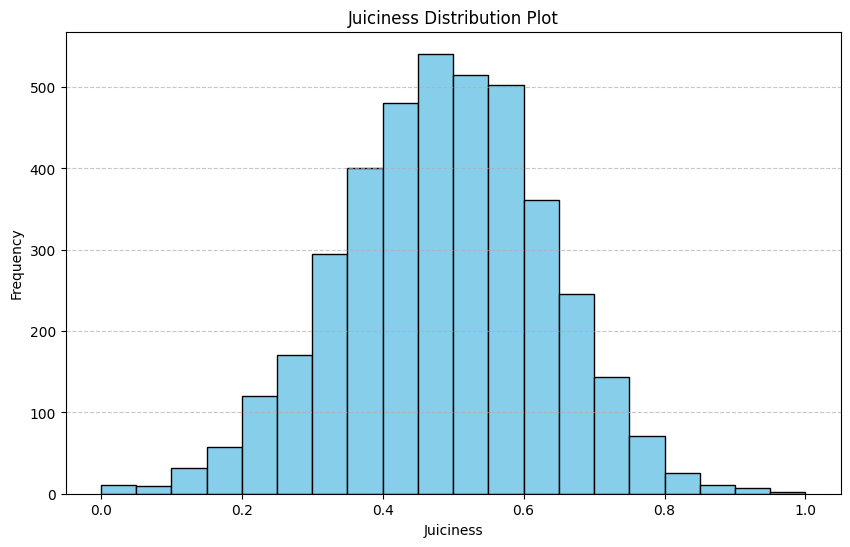

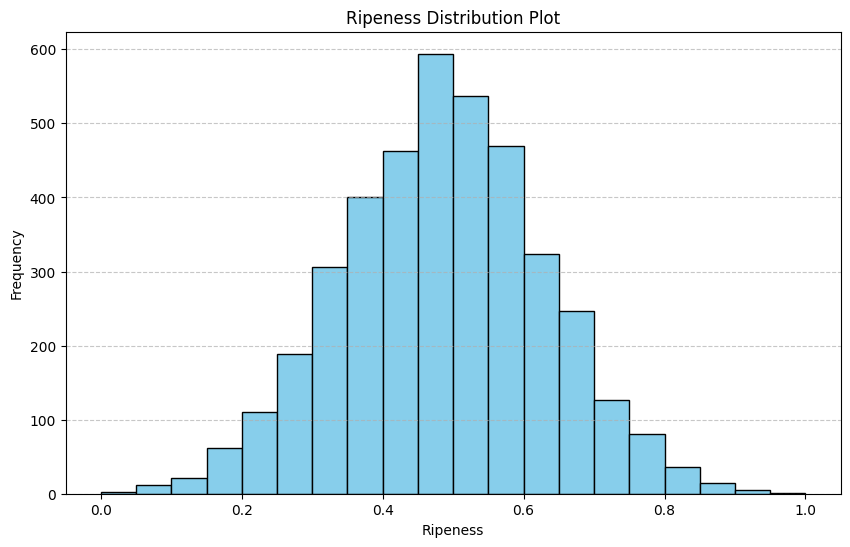

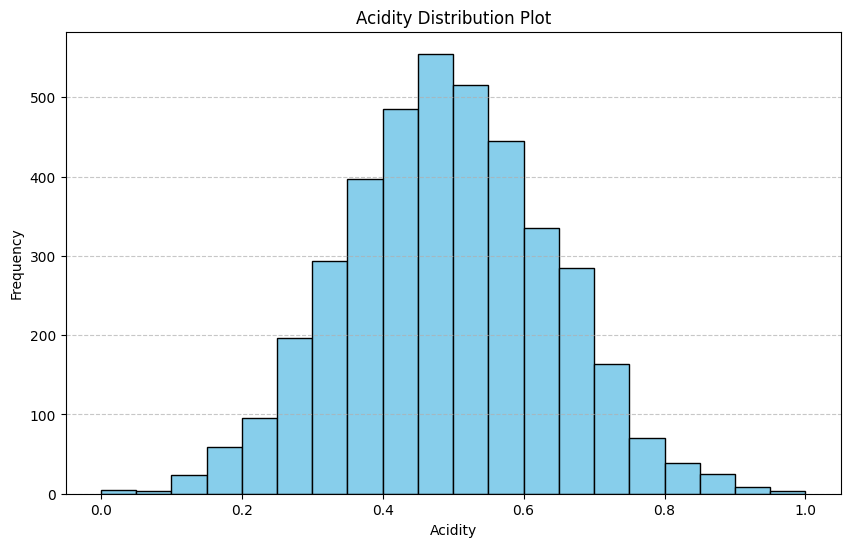

In [ ]:
# Histogramas das características: Histogramas podem ajudar a
# entender a distribuição de cada característica em seus dados.
# Lista de nomes das características
feature_names = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

# Para cada coluna em X, crie um histograma
for i in range(X.shape[1]):
    plt.figure(figsize=(10, 6))
    plt.hist(X[:, i], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(feature_names[i])
    plt.ylabel('Frequency')
    plt.title(f'{feature_names[i]} Distribution Plot')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



In [ ]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, adjusted_rand_score
from scipy.spatial.distance import cdist

# Compute the topographic error
topographic_error = som.topographic_error(X)
print("Topographic Error:", topographic_error)

# Erro de quantização
# O erro de quantização é a distância média entre cada
# dado e o neurônio vencedor correspondente. Um erro de quantização
# menor indica que o SOM está fazendo um bom trabalho em representar os dados.
distances = cdist(X, som.get_weights().reshape(-1, X.shape[1]))
quantization_error = np.min(distances, axis=1).mean()
print(f'Erro de quantização: {quantization_error}')

# Obtenha o mapeamento de rótulos do SOM
labels_map = som.labels_map(X, data['Quality'])

# Crie um array 1D de rótulos de cluster
labels = np.empty(X.shape[0], dtype=object)
for i, c in enumerate(clusters):
    labels[i] = max(labels_map[tuple(c)], key=labels_map[tuple(c)].get)

# Agora você pode usar 'labels' nas funções de métrica de desempenho

# Índice de Davies-Bouldin
# O índice de Davies-Bouldin é uma métrica de avaliação de cluster que pode
# ser usada para avaliar a qualidade do mapeamento do SOM. Ele é baseado na
# razão média da distância dentro do cluster para a distância entre clusters.
# Um valor menor do índice de Davies-Bouldin indica um melhor mapeamento.
db_score = davies_bouldin_score(X, labels)
print(f'Índice de Davies-Bouldin: {db_score}')

# Índice de Silhueta
# O índice de silhueta é outra métrica de avaliação de cluster que pode ser usada
# para avaliar a qualidade do mapeamento do SOM. Ele mede o quão semelhante é um
# objeto aos seus próprios clusters em comparação com outros clusters. O índice de
# silhueta varia de -1 a 1, onde um valor alto indica que o objeto está bem
# combinado com seu próprio cluster e mal combinado com os clusters vizinhos.
silhouette_avg = silhouette_score(X, labels)
print(f'Índice de Silhueta: {silhouette_avg}')


Topographic Error: 0.937
Erro de quantização: 0.13110985049859755
Índice de Davies-Bouldin: 3.9422207950753836
Índice de Silhueta: 0.05769015798535032
